In [90]:
import numpy as np
import pandas as pd

import warnings
warnings.simplefilter('ignore', FutureWarning)

%matplotlib inline
import matplotlib.pyplot as plt

import pickle

In [91]:
#https://www.thepythoncode.com/article/extracting-and-submitting-web-page-forms-in-python
# # Seaborn visualization library
# import seaborn as sns
# # Create the default pairplot
# sns.pairplot(df)

# Pre-processing code from template - START
Project3Git/04 Pre-processing Template/01 Pre-processing- X-Y split - Y One-Hot Encoding - Train-Test Split - Scaling X Training Data.ipynb

In [92]:
#Import encoded data
bankchurnersencoded = pd.read_csv('../03 Feature Engineering/bankchurnersencoded.csv')
bankchurnersencoded.head(10)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,1,3,3,1,4,1,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,0,5,5,2,2,1,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,1,3,5,1,5,1,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,0,4,3,3,2,1,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,1,3,2,1,4,1,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
5,713061558,Existing Customer,44,1,2,5,1,3,1,36,...,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311
6,810347208,Existing Customer,51,1,4,1,1,6,3,46,...,1,3,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066
7,818906208,Existing Customer,32,1,0,3,3,4,2,27,...,2,2,29081.0,1396,27685.0,2.204,1538,36,0.714,0.048
8,710930508,Existing Customer,37,1,3,2,2,4,1,36,...,2,0,22352.0,2517,19835.0,3.355,1350,24,1.182,0.113
9,719661558,Existing Customer,48,1,2,5,2,5,1,36,...,3,3,11656.0,1677,9979.0,1.524,1441,32,0.882,0.144


# Split data into X (features) and Y (classes)

In [93]:
# Create X data (Features)
X = bankchurnersencoded.drop(["CLIENTNUM", "Attrition_Flag"], axis=1)
print(X.shape)

(10127, 19)


In [94]:
# Create y (classification data)
y = bankchurnersencoded["Attrition_Flag"]
print(y.shape)

(10127,)


# Split data into Train and Test data

In [95]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical

In [96]:
#Define split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=1)

**Resetting X_test and Y_test index**

In [97]:
X_test = X_test.reset_index(drop=True)
X_test[:5]

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,43,0,2,5,1,2,1,36,6,3,2,2570.0,2107,463.0,0.651,4058,83,0.766,0.820
1,38,0,1,4,3,2,1,32,2,3,3,2609.0,1259,1350.0,0.871,8677,96,0.627,0.483
2,39,1,2,4,1,4,1,31,6,3,2,9871.0,1061,8810.0,0.545,1683,34,0.478,0.107
3,44,1,4,5,1,6,1,32,6,3,4,34516.0,2517,31999.0,0.765,4228,83,0.596,0.073
4,38,0,2,7,1,2,1,28,5,2,4,1614.0,0,1614.0,0.609,2437,46,0.438,0.000


In [98]:
y_test = y_test.reset_index(drop=True)
y_test[:5]

0    Existing Customer
1    Existing Customer
2    Existing Customer
3    Existing Customer
4    Attrited Customer
Name: Attrition_Flag, dtype: object

# One-hot encode Y classes

* Initial label encoding

In [99]:
# Set encoder
label_encoder = LabelEncoder()

In [100]:
# Fit Y classes to encoder
label_encoder.fit(y_train)

LabelEncoder()

In [101]:
#Transform Y-train classes - CAN ONLY DO THIS ONCE
encoded_y_train = label_encoder.transform(y_train)

In [102]:
print("Y train first ten classes")
print(y_train[:10])

Y train first ten classes
4477    Existing Customer
5191    Attrited Customer
2150    Existing Customer
1821    Existing Customer
9127    Existing Customer
1669    Existing Customer
7548    Existing Customer
7079    Existing Customer
8674    Existing Customer
4355    Existing Customer
Name: Attrition_Flag, dtype: object


In [103]:
print("Y train Encoded first ten classes")
print(encoded_y_train[:10])

Y train Encoded first ten classes
[1 0 1 1 1 1 1 1 1 1]


In [104]:
#Transform Y-test classes - CAN ONLY DO THIS ONCE
encoded_y_test = label_encoder.transform(y_test)

In [105]:
print("Y test first ten classes")
print(y_test[:10])

Y test first ten classes
0    Existing Customer
1    Existing Customer
2    Existing Customer
3    Existing Customer
4    Attrited Customer
5    Existing Customer
6    Attrited Customer
7    Existing Customer
8    Existing Customer
9    Attrited Customer
Name: Attrition_Flag, dtype: object


In [106]:
print("Y test Encoded first ten classes")
print(encoded_y_test[:10])

Y test Encoded first ten classes
[1 1 1 1 0 1 0 1 1 0]


* One-hot encoding
    * Think we may only need this if doing deep learning - other models may only require labelencoding

In [107]:
#One-hot transform Y train - CAN ONLY DO ONCE
y_train_categorical = to_categorical(encoded_y_train)

In [108]:
print("Y train first ten classes")
print(y_train[:10])

Y train first ten classes
4477    Existing Customer
5191    Attrited Customer
2150    Existing Customer
1821    Existing Customer
9127    Existing Customer
1669    Existing Customer
7548    Existing Customer
7079    Existing Customer
8674    Existing Customer
4355    Existing Customer
Name: Attrition_Flag, dtype: object


In [109]:
print("Y train One-Hot encoded first ten classes")
print(y_train_categorical[:10])

Y train One-Hot encoded first ten classes
[[0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [110]:
#One-hot transform Y test - CAN ONLY DO ONCE
y_test_categorical = to_categorical(encoded_y_test)

In [111]:
print("Y test first ten classes")
print(y_test[:10])

Y test first ten classes
0    Existing Customer
1    Existing Customer
2    Existing Customer
3    Existing Customer
4    Attrited Customer
5    Existing Customer
6    Attrited Customer
7    Existing Customer
8    Existing Customer
9    Attrited Customer
Name: Attrition_Flag, dtype: object


In [112]:
print("Y test One-Hot encoded first ten classes")
print(y_test_categorical[:10])

Y test One-Hot encoded first ten classes
[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]]


# Scale X data

### Code to scale specific columns (features)

In [113]:
#Import Scaler
from pickle import load
X_scaler = load(open('../04 Pre-processing Template/X_scaler.pkl', 'rb'))

In [114]:
#List columns that need scaling
col_names = ['Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1']
col_names

['Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1']

**Pass X_train data through scaling model**

In [115]:
#Copy the dataframe
X_train_scaled = X_train.copy()

In [116]:
#Create dataframe of just the columns to be scaled
X_train_features = X_train_scaled[col_names]
X_train_features.head()

,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1
4477,31,4,2,3,18056.0,940,17116.0,0.629,4473,72,0.600
5191,36,4,3,6,7939.0,0,7939.0,0.551,2269,42,0.312
2150,17,5,1,2,7173.0,1227,5946.0,0.646,1793,33,0.737
1821,36,6,2,4,3586.0,1414,2172.0,0.745,2780,57,0.727
9127,46,2,3,2,34516.0,0,34516.0,0.887,8416,93,0.632


In [117]:
#Transform the data
X_train_features = X_scaler.transform(X_train_features.values)
X_train_features

array([[0.41860465, 0.6       , 0.33333333, ..., 0.22665142, 0.48062016,
        0.16155089],
       [0.53488372, 0.6       , 0.5       , ..., 0.10060051, 0.24806202,
        0.08400646],
       [0.09302326, 0.8       , 0.16666667, ..., 0.07337718, 0.17829457,
        0.19843834],
       ...,
       [0.60465116, 0.4       , 0.5       , ..., 0.02459251, 0.11627907,
        0.12681745],
       [0.51162791, 0.4       , 0.33333333, ..., 0.21063769, 0.53488372,
        0.23721055],
       [0.81395349, 0.6       , 0.5       , ..., 0.05730626, 0.13178295,
        0.3917609 ]])

**Update data frame**

In [118]:
#Updated originally copied df with new scaled features
X_train_scaled[col_names] = X_train_features

In [119]:
# X_train_scaled.head()

**Pass X-test data through scaling model**

In [120]:
#Copy the dataframe
X_test_scaled = X_test.copy()

In [121]:
#Create dataframe of just the columns to be scaled
X_test_features = X_test_scaled[col_names]
X_test_features.head()

,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1
0,36,6,3,2,2570.0,2107,463.0,0.651,4058,83,0.766
1,32,2,3,3,2609.0,1259,1350.0,0.871,8677,96,0.627
2,31,6,3,2,9871.0,1061,8810.0,0.545,1683,34,0.478
3,32,6,3,4,34516.0,2517,31999.0,0.765,4228,83,0.596
4,28,5,2,4,1614.0,0,1614.0,0.609,2437,46,0.438


In [122]:
#Transform the data
X_test_features = X_scaler.transform(X_test_features.values)
X_test_features

array([[0.53488372, 1.        , 0.5       , ..., 0.20291679, 0.56589147,
        0.20624663],
       [0.44186047, 0.2       , 0.5       , ..., 0.46708607, 0.66666667,
        0.16882068],
       [0.41860465, 1.        , 0.5       , ..., 0.06708607, 0.18604651,
        0.12870221],
       ...,
       [0.53488372, 1.        , 0.33333333, ..., 0.06182442, 0.25581395,
        0.19386107],
       [0.53488372, 0.4       , 0.33333333, ..., 0.25621962, 0.54263566,
        0.24367259],
       [0.55813953, 0.2       , 0.5       , ..., 0.48138404, 0.72093023,
        0.17097469]])

In [123]:
#Updated originally copied df with new scaled features
X_test_scaled[col_names] = X_test_features

In [124]:
X_test_scaled.head()

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,43,0,2,5,1,2,1,0.534884,1.0,0.500000,0.333333,0.034213,0.837108,0.013328,0.191640,0.202917,0.565891,0.206247,0.820
1,38,0,1,4,3,2,1,0.441860,0.2,0.500000,0.500000,0.035392,0.500199,0.039029,0.256403,0.467086,0.666667,0.168821,0.483
2,39,1,2,4,1,4,1,0.418605,1.0,0.500000,0.333333,0.254936,0.421534,0.255179,0.160436,0.067086,0.186047,0.128702,0.107
3,44,1,4,5,1,6,1,0.441860,1.0,0.500000,0.666667,1.000000,1.000000,0.927071,0.225199,0.212639,0.565891,0.160474,0.073
4,38,0,2,7,1,2,1,0.348837,0.8,0.333333,0.666667,0.005312,0.000000,0.046678,0.179276,0.110209,0.279070,0.117932,0.000


Old code for scaling entire data - which is not required

In [125]:
#Scaling specific columns test
# X_scaler = MinMaxScaler()

In [126]:
#Fit X_traindata to scaler
# X_scaler = MinMaxScaler().fit(X_train)

In [127]:
#Transform X-train data - CAN ONLY RUN THIS ONCE
# X_train_scaled = X_scaler.transform(X_train)

In [128]:
#Transform X-Test data - CAN ONLY RUN THIS ONCE
# X_test_scaled = X_scaler.transform(X_test)

In [129]:
# X_test_scaled[:10]

# Pre-processing code from template - STOP

# Machine Learning Model - Decision Tree

In [130]:
# Uncomment pip install if sklearn not up to date 
# Update sklearn to prevent version mismatches
#!pip install sklearn --upgrade

In [131]:
# Uncomment if joblib not installed
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
#!pip install joblib

In [132]:
import os

In [133]:
from sklearn import tree

In [134]:
#define the model
classifier = tree.DecisionTreeClassifier()
classifier

DecisionTreeClassifier()

In [135]:
#Fit the model
classifier = classifier.fit(X_train_scaled, y_train_categorical)

In [136]:
#Score the model
print(f"Training Data Score: {classifier.score(X_train_scaled, y_train_categorical)}")
print(f"Testing Data Score: {classifier.score(X_test_scaled, y_test_categorical)}")

Training Data Score: 1.0
Testing Data Score: 0.9360189573459715


## Prediction

In [137]:
predictions_tree = classifier.predict(X_test_scaled)

In [138]:
#https://stackoverflow.com/questions/47380663/numpy-reverse-keras-to-categorical
predictions_tree_decoded = np.argmax(predictions_tree, axis=1)
predictions_tree_decoded

array([1, 1, 1, ..., 1, 1, 1])

In [139]:
#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html
predictions_tree_labels = label_encoder.inverse_transform(predictions_tree_decoded)

In [140]:
predictions_tree_labels

array(['Existing Customer', 'Existing Customer', 'Existing Customer', ...,
       'Existing Customer', 'Existing Customer', 'Existing Customer'],
      dtype=object)

In [141]:
y_test

0       Existing Customer
1       Existing Customer
2       Existing Customer
3       Existing Customer
4       Attrited Customer
              ...        
2527    Existing Customer
2528    Existing Customer
2529    Existing Customer
2530    Existing Customer
2531    Existing Customer
Name: Attrition_Flag, Length: 2532, dtype: object

In [142]:
y_test_string = y_test.reset_index(drop=True)

In [143]:
#print("Tree Predicted Labels:")
# for i in range(0,50):
#     print(f"Tree Predicted Output:{predictions_tree[i]} {predictions_tree_labels[i]} - Actual classification: {y_test_string[i]}")
# print("-" * 20)

## Create comparison data frame

In [144]:
#print("Tree Predicted Labels:")
# for i in range(0,50):
#     print(f"Tree Predicted Output:{predictions_tree[i]} {predictions_tree_labels[i]} - Actual classification: {y_test_string[i]}")
# print("-" * 20)

In [145]:
#Dataframe
comparison_tree = pd.DataFrame({'Prediction Class': predictions_tree_decoded,
                                'Prediction Label':predictions_tree_labels,
                                'Actual Label':y_test})
comparison_tree[:50]

,Prediction Class,Prediction Label,Actual Label
0,1,Existing Customer,Existing Customer
1,1,Existing Customer,Existing Customer
2,1,Existing Customer,Existing Customer
3,1,Existing Customer,Existing Customer
4,0,Attrited Customer,Attrited Customer
5,1,Existing Customer,Existing Customer
6,0,Attrited Customer,Attrited Customer
7,1,Existing Customer,Existing Customer
8,1,Existing Customer,Existing Customer
9,0,Attrited Customer,Attrited Customer


In [146]:
#Find all Predicted Attrited Customers
#onlybilly = df.loc[df[“first name”] == “Billy”, :]
attrited_only = comparison_tree.loc[comparison_tree["Prediction Label"] == "Attrited Customer", :]
print(f"In the Test data there is {len(attrited_only)} attrited customers out of {len(comparison_tree)} records.")
attrited_only[:10]

In the Test data there is 411 attrited customers out of 2532 records.


,Prediction Class,Prediction Label,Actual Label
4,0,Attrited Customer,Attrited Customer
6,0,Attrited Customer,Attrited Customer
9,0,Attrited Customer,Attrited Customer
25,0,Attrited Customer,Existing Customer
28,0,Attrited Customer,Attrited Customer
37,0,Attrited Customer,Attrited Customer
41,0,Attrited Customer,Attrited Customer
46,0,Attrited Customer,Attrited Customer
48,0,Attrited Customer,Existing Customer
50,0,Attrited Customer,Attrited Customer


In [147]:
#From predicted Attrited customers, find all actual labels equal to Existing Customer 
incorrect_attrited = attrited_only.loc[attrited_only["Actual Label"] == "Existing Customer", :]
print(f"There are {len(incorrect_attrited)} incorrectly predicted attrited customers out of {len(attrited_only)} predicted attrities")
Percent_correct = str(round(((len(attrited_only)-len(incorrect_attrited))/len(attrited_only))*100, 2))
print(f"This is an actual accuracy of {Percent_correct}%.")
incorrect_attrited
      

There are 84 incorrectly predicted attrited customers out of 411 predicted attrities
This is an actual accuracy of 79.56%.


,Prediction Class,Prediction Label,Actual Label
25,0,Attrited Customer,Existing Customer
48,0,Attrited Customer,Existing Customer
56,0,Attrited Customer,Existing Customer
125,0,Attrited Customer,Existing Customer
158,0,Attrited Customer,Existing Customer
...,...,...,...
2481,0,Attrited Customer,Existing Customer
2486,0,Attrited Customer,Existing Customer
2498,0,Attrited Customer,Existing Customer
2509,0,Attrited Customer,Existing Customer


# Machine Learning Model - Random Forest Model

In [148]:
from sklearn.ensemble import RandomForestClassifier

In [149]:
#Define model
randomforestmodel = RandomForestClassifier(n_estimators=200)

In [150]:
#Fit the model
randomforest = randomforestmodel.fit(X_train_scaled, y_train_categorical)

In [151]:
# Score the model
print(f"Training Data Score: {randomforest.score(X_train_scaled, y_train_categorical)}")
print(f"Testing Data Score: {randomforest.score(X_test_scaled, y_test_categorical)}")

Training Data Score: 1.0
Testing Data Score: 0.9593206951026856


In [152]:
feature_names = bankchurnersencoded.columns
feature_names

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [153]:
importance = sorted(zip(randomforest.feature_importances_, feature_names), reverse=True)

In [154]:
importance 

[(0.183967507712964, 'Avg_Open_To_Buy'),
 (0.17290995121066863, 'Total_Amt_Chng_Q4_Q1'),
 (0.1135061007919371, 'Total_Trans_Amt'),
 (0.10929944790438206, 'Contacts_Count_12_mon'),
 (0.06470199941631376, 'Card_Category'),
 (0.06448713431064271, 'Total_Trans_Ct'),
 (0.06136984412583043, 'Total_Revolving_Bal'),
 (0.03540055948110949, 'Months_Inactive_12_mon'),
 (0.03353874210785664, 'CLIENTNUM'),
 (0.03160361607100061, 'Credit_Limit'),
 (0.0249532138020895, 'Total_Relationship_Count'),
 (0.024810879680735254, 'Income_Category'),
 (0.023371269592604355, 'Months_on_book'),
 (0.012638142893938324, 'Customer_Age'),
 (0.012236709246663492, 'Gender'),
 (0.010750824365647012, 'Education_Level'),
 (0.00958467443958011, 'Dependent_count'),
 (0.007860635906853672, 'Attrition_Flag'),
 (0.003008746939182921, 'Marital_Status')]

In [155]:
importanceDF = pd.DataFrame(importance, columns=['Importance', 'Features'])
importanceDF

,Importance,Features
0,0.183968,Avg_Open_To_Buy
1,0.172910,Total_Amt_Chng_Q4_Q1
2,0.113506,Total_Trans_Amt
3,0.109299,Contacts_Count_12_mon
4,0.064702,Card_Category
5,0.064487,Total_Trans_Ct
6,0.061370,Total_Revolving_Bal
7,0.035401,Months_Inactive_12_mon
8,0.033539,CLIENTNUM
9,0.031604,Credit_Limit


In [ ]:
importanceDF= importanceDF.set_index("Features")
importanceDF

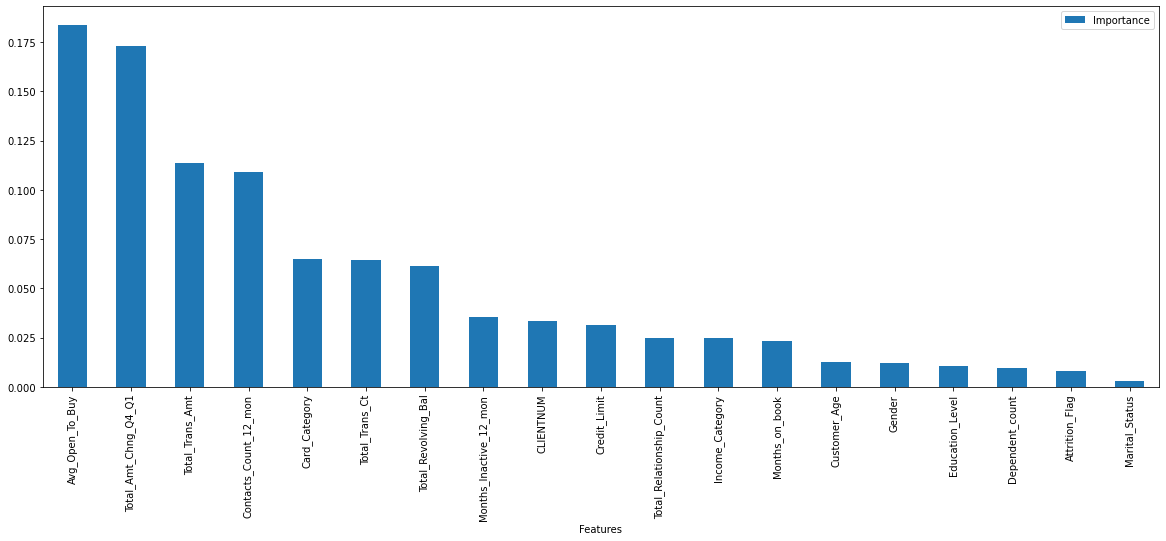

In [159]:
importanceDF.plot(x ='Features', y='Importance', kind = 'bar', figsize=(20, 7))

## Prediction

In [ ]:
predictions_forest = randomforest.predict(X_test_scaled)

In [ ]:
predictions_forest_decoded = np.argmax(predictions_forest, axis=1)
predictions_forest_decoded

In [ ]:
predictions_forest_labels = label_encoder.inverse_transform(predictions_forest_decoded)
predictions_forest_labels[:10]

## Create comparison data frame

In [ ]:
comparison_forest = pd.DataFrame({'Prediction Class': predictions_forest_decoded,
                                'Prediction Label':predictions_forest_labels,
                                'Actual Label':y_test})
comparison_forest[:50]

In [ ]:
#Find all Predicted Attrited Customers
attrited_only_forest = comparison_forest.loc[comparison_forest["Prediction Label"] == "Attrited Customer", :]
print(f"In the Test data there is {len(attrited_only_forest)} attrited customers out of {len(comparison_forest)} records.")
attrited_only_forest[:10]

In [ ]:
#From predicted Attrited customers, find all actual labels equal to Existing Customer 
incorrect_attrited_forest = attrited_only_forest.loc[attrited_only_forest["Actual Label"] == "Existing Customer", :]
print(f"There are {len(incorrect_attrited_forest)} incorrectly predicted attrited customers out of {len(attrited_only_forest)} predicted attrities")
Percent_correct_forest = str(round(((len(attrited_only_forest)-len(incorrect_attrited_forest))/len(attrited_only_forest))*100, 2))
print(f"This is an actual accuracy of {Percent_correct_forest}%.")
incorrect_attrited_forest

# Save the model - Random Forest
https://mljar.com/blog/save-load-random-forest/

In [ ]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'randomforest_model_trained.sav'
joblib.dump(randomforest, filename)

In [ ]:
#Save using pickle as joblib nbot importing in app.py
pickle.dump(randomforest, open(filename, 'wb'))